In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = np.genfromtxt('accel_data.csv', delimiter=',', skip_header=1)
# only take first 600 data points
data = data[:600]
print(data)

[[ 0.01201292 -0.30226048  0.24621741 -0.62522874  0.73681435]
 [ 0.02200592 -0.22121899  0.1749188  -0.31769618  0.42481207]
 [ 0.03199992 -0.02470092  0.03929563  0.23078492  0.23540595]
 ...
 [ 5.97817579  0.13112549  0.40324468 -0.24003697  0.48725549]
 [ 5.98816979  0.15708516  0.33129403 -0.31592038  0.48398055]
 [ 5.99816279  0.12216171  0.36722232 -0.3332299   0.51070332]]


In [28]:
time = data[:,0]
z_accel = data[:,3]

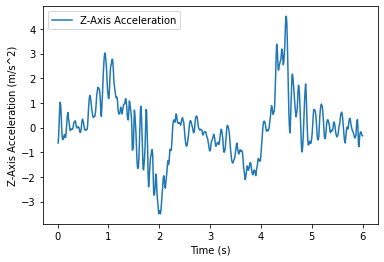

In [29]:
plt.plot(time, z_accel)
plt.xlabel('Time (s)')
plt.ylabel('Z-Axis Acceleration (m/s^2)')
plt.legend(['Z-Axis Acceleration'])

In [33]:
# get the integral of the acceleration data at every time point without using np.cumsum
velocity = np.zeros(len(z_accel))
for enum, i in enumerate(data):
    if enum<len(z_accel)-1:
        time_delta = time[enum+1] - time[enum]
        velocity[enum] = sum(z_accel[:enum+1]*time_delta)

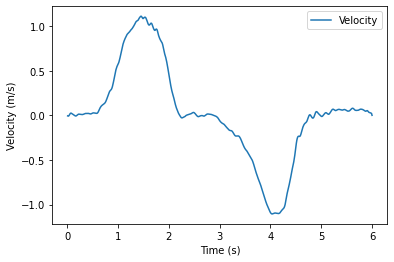

In [35]:
plt.plot(time, velocity)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Velocity'])

In [38]:
distance = np.zeros(len(velocity))
for enum, i in enumerate(velocity):
    if enum<len(velocity)-1:
        time_delta = time[enum+1] - time[enum]
        distance[enum] = sum(velocity[:enum+1]*time_delta)

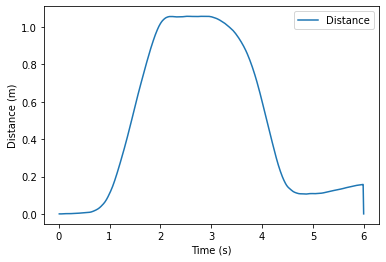

In [40]:
plt.plot(time, distance)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend(['Distance'])

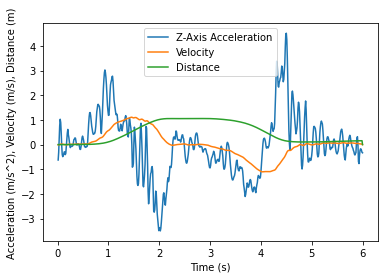

In [41]:
#superimposing all plots
plt.plot(time, z_accel)
plt.plot(time, velocity)
plt.plot(time, distance)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2), Velocity (m/s), Distance (m)')
plt.legend(['Z-Axis Acceleration', 'Velocity', 'Distance'])